<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/GAN_acc_0_49.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **data load**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"gangyeonee","key":"439884bd9c44b7629b04d9101d06cf61"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
#Fake directory 생성
!mkdir -p GAN

#11분 정도 걸립니다... content/fake폴더 안에 생기도록 설정함.
# 해당 dataset png파일들만 존재..
!kaggle datasets download -d xhlulu/140k-real-and-fake-faces -p GAN --unzip

Dataset URL: https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces
License(s): other
100% 3.74G/3.75G [01:36<00:00, 43.8MB/s]
100% 3.75G/3.75G [01:36<00:00, 41.6MB/s]


# **data 경로지정**

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/GAN'):
    for filename in filenames:
        os.path.join(dirname, filename)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

In [7]:
dataset_dir1 = "/content/GAN/real_vs_fake/real-vs-fake"
# dataset_dir2 = "/content/kaggle/input/cifake-real-and-ai-generated-synthetic-images/" # For Kaggle notebooks. If you run locally, point this line to the CIFAKE directory
print("Loading dataset from: " + dataset_dir1)

Loading dataset from: /content/GAN/real_vs_fake/real-vs-fake


In [8]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [9]:
img_height = 64
img_width = 64
batch_size = 200

dir1_1 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1 + "/train",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

dir1_2 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1 + "/valid",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

dir1_3 = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1 + "/test",
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

dir1_dataset = dir1_1.concatenate(dir1_2)
final_dataset = dir1_dataset.concatenate(dir1_3)

def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [10]:
for i, l in final_dataset.take(5):
  print("label:",l)

label: tf.Tensor(
[0 1 0 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1
 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1
 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1
 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0], shape=(200,), dtype=int32)
label: tf.Tensor(
[0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1
 1 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1], shape=(200,), dtype=int32)
label: tf.Tensor(
[0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0
 

In [10]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400)

In [11]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [12]:
len(final_shuffled_dataset)

700

In [13]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 448
validation_dataset size: 112
test_dataset size 140


# **ResNet 모델로 Transfer Learning**

In [18]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                           

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

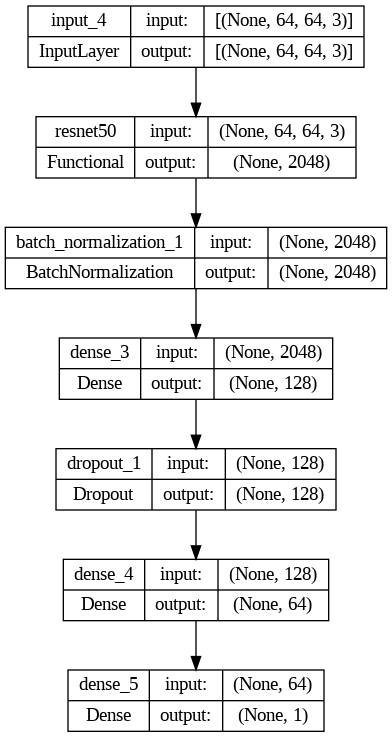

In [20]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [21]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/10
448/448 [==============================] - 165s 251ms/step - loss: 1.5624 - accuracy: 0.5541 - precision_1: 0.5759 - recall_1: 0.4121 - val_loss: 1.4771 - val_accuracy: 0.4963 - val_precision_1: 0.5280 - val_recall_1: 0.0416
Epoch 2/10
448/448 [==============================] - 132s 256ms/step - loss: 0.5872 - accuracy: 0.8118 - precision_1: 0.7875 - recall_1: 0.8522 - val_loss: 0.8331 - val_accuracy: 0.6687 - val_precision_1: 0.6021 - val_recall_1: 0.9980
Epoch 3/10
448/448 [==============================] - 132s 255ms/step - loss: 0.3271 - accuracy: 0.8889 - precision_1: 0.8719 - recall_1: 0.9115 - val_loss: 3.3012 - val_accuracy: 0.5051 - val_precision_1: 0.5028 - val_recall_1: 1.0000
Epoch 4/10
448/448 [==============================] - 133s 257ms/step - loss: 0.2480 - accuracy: 0.9170 - precision_1: 0.9042 - recall_1: 0.9331 - val_loss: 4.2713 - val_accuracy: 0.5018 - val_precision_1: 0.5006 - val_recall_1: 1.00

# **검증**

In [22]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

112/112 [==============================] - 26s 57ms/step - loss: 0.2041 - accuracy: 0.9273 - precision_1: 0.9986 - recall_1: 0.8541
Val Loss: 0.2041
Val Accuracy: 0.9273
Val Precision: 0.9986
Val Recall: 0.8541


In [23]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

140/140 [==============================] - 25s 57ms/step - loss: 0.2050 - accuracy: 0.9291 - precision_1: 0.9983 - recall_1: 0.8593
test Loss: 0.2050
test Accuracy: 0.9291
test Precision: 0.9983
test Recall: 0.8593


# **모델 저장**

In [24]:
#모델 저장
ResNet_model.save('ResNet_c_model_GAN.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#모델 불러오기
ResNet_model = tf.keras.models.load_model('ResNet_c_model_GAN.h5')

# **[ Evaluation ] Confusion Matrix, F1 score, ROC curve**

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = ResNet_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images = tp_images[:5]
tn_images = tn_images[:5]
fp_images = fp_images[:5]
fn_images = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

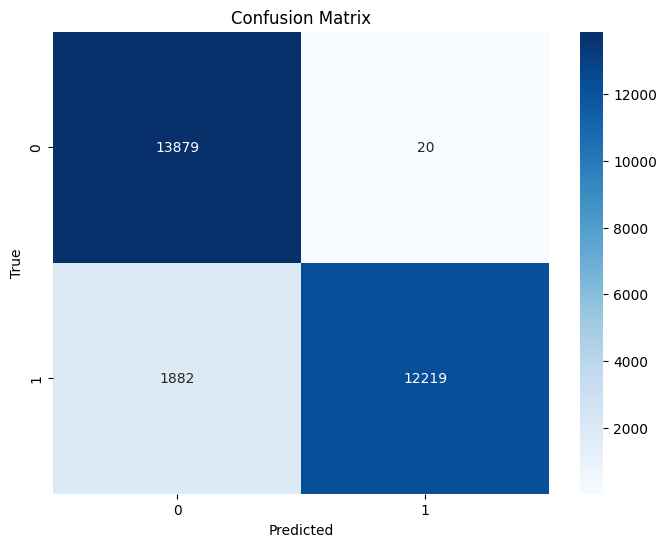

Accuracy: 0.9320714285714286
Precision: 0.998365879565324
Recall: 0.8665342883483441
F1 Score: 0.9277904328018223


In [26]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


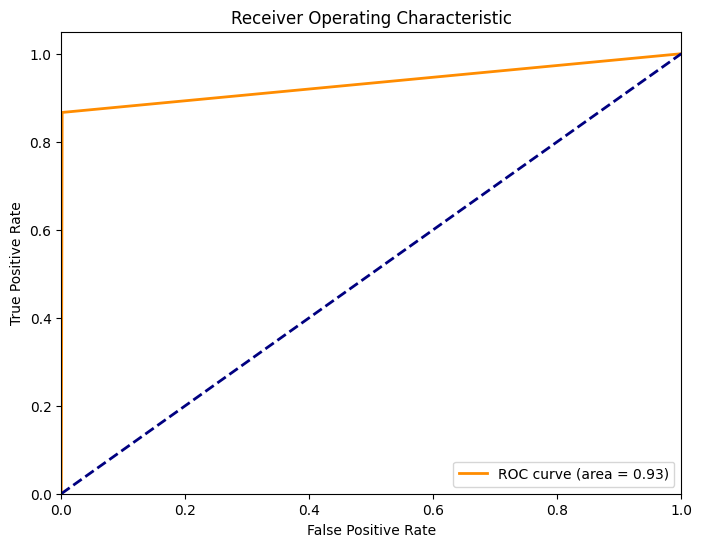

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 12219
True Negative (TN): 13879
False Positive (FP): 20
False Negative (FN): 1882


**Visualization**

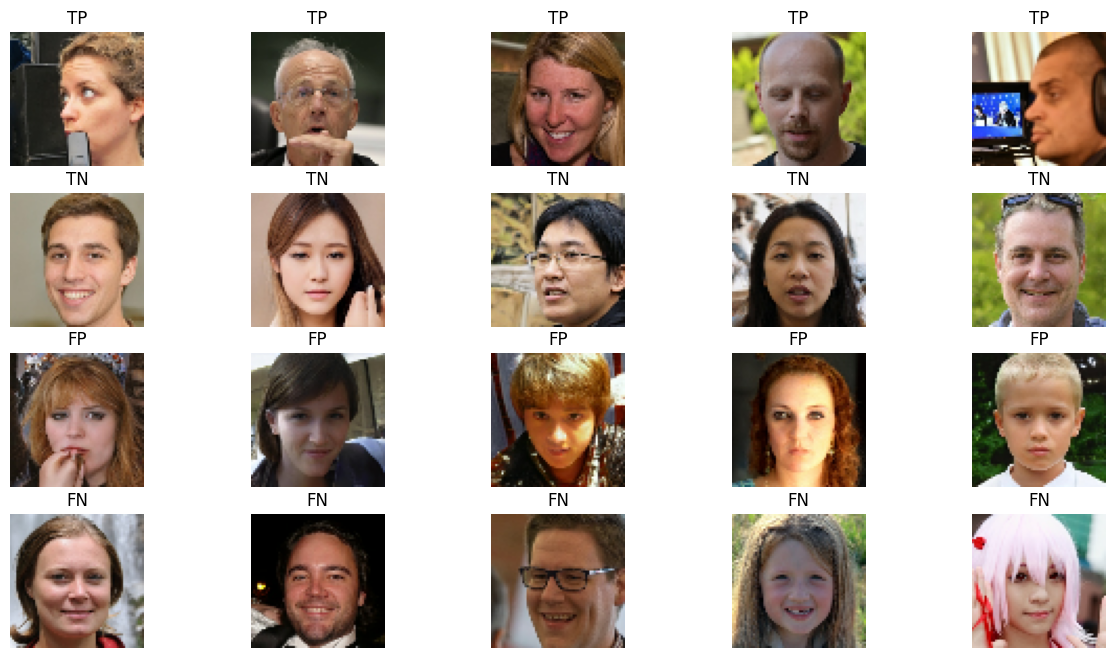

In [29]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()


# **Test dataset 변경**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# ResNet50 모델 불러오기 (ImageNet 가중치 사용)

# 이미지 파일 경로
img_path = '/content/drive/MyDrive/images/Real/11.png'  # 여기에 실제 이미지 파일 경로를 입력하세요.



# 이미지 로드 및 전처리
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 예측 수행
preds = ResNet_model.predict(x)

# 결과 디코딩 및 출력
print('Predicted:', preds)

# 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images/Real/11.png'

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(dir2_1)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")


167/167 [==============================] - 5s 22ms/step - loss: 0.0149 - accuracy: 0.9984 - precision_3: 0.9984 - recall_3: 0.9983
test Loss: 0.0149
test Accuracy: 0.9984
test Precision: 0.9984
test Recall: 0.9983


In [ ]:
result_show(ResNet_model,dir2_1)

NameError: name 'result_show' is not defined

In [ ]:
#테스ㅌ
dir = '/content/drive/MyDrive/이미지 데이터셋 폴더'

rt= tf.keras.utils.image_dataset_from_directory(
  dir,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 10)


def result_show(model,test_dataset):
  result = model.predict(test_dataset)
  cnt = 0
  for images ,labels in test_dataset.take(50):
    plt.figure(figsize=(10,10))
    for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      if int(labels[i]) == 0:
        isReal = 'Fake'
      else:
        isReal = 'Real'

      if result[cnt][0] >= 0.5:
        a = "Real"
      else :
        a = 'Fake'

      plt.title(f"{isReal} -> {a}")
      cnt +=1
      plt.axis("off")
    plt.show()
  test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

  print(f"test Loss: {test_loss:.4f}")
  print(f"test Accuracy: {test_accuracy:.4f}")
  print(f"test Precision: {test_precision:.4f}")
  print(f"test Recall: {test_recall:.4f}")

result_show(ResNet_model,rt)

NotFoundError: Could not find directory /content/drive/MyDrive/이미지 데이터셋 폴더

# **VGG16 모델**

In [14]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



In [15]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [16]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                             

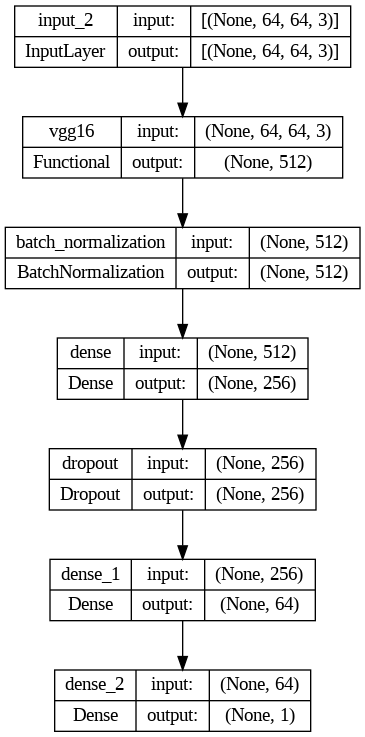

In [17]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [19]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

In [20]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 10,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/10
448/448 [==============================] - 160s 271ms/step - loss: 1.4296 - accuracy: 0.5669 - precision: 0.6001 - recall: 0.4014 - val_loss: 1.6173 - val_accuracy: 0.4968 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
448/448 [==============================] - 139s 273ms/step - loss: 0.5305 - accuracy: 0.7936 - precision: 0.7969 - recall: 0.7896 - val_loss: 1.5494 - val_accuracy: 0.5045 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
448/448 [==============================] - 140s 275ms/step - loss: 0.2780 - accuracy: 0.9078 - precision: 0.8959 - recall: 0.9227 - val_loss: 0.2335 - val_accuracy: 0.9185 - val_precision: 0.9566 - val_recall: 0.8766
Epoch 4/10
448/448 [==============================] - 140s 275ms/step - loss: 0.1874 - accuracy: 0.9423 - precision: 0.9341 - recall: 0.9516 - val_loss: 0.5756 - val_accuracy: 0.7923 - val_precision: 0.9991 - val_recall: 0.5856
Epoch 5/10
448/4

validation_dataset으로 검증

In [21]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

112/112 [==============================] - 24s 66ms/step - loss: 0.0759 - accuracy: 0.9784 - precision: 0.9991 - recall: 0.9569
val Loss: 0.0759
Val Accuracy: 0.9784
Val Precision: 0.9991
Val Recall: 0.9569


테스트셋으로 검증

In [22]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

140/140 [==============================] - 26s 63ms/step - loss: 0.0781 - accuracy: 0.9780 - precision: 0.9996 - recall: 0.9560
test Loss: 0.0781
test Accuracy: 0.9780
test Precision: 0.9996
test Recall: 0.9560


In [23]:
#모델 저장
VGG_model.save('VGGnet_c_model_GAN.h5')
model_json = VGG_model.to_json()
with open('VGG_model.json','w') as f:
  f.write(model_json)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
#모델 불러오기
VGG_model = tf.keras.models.load_model('VGGnet_c_model_GAN.h5')

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 테스트 데이터셋에 대한 예측, 실제 레이블, 이미지 추출
X_test = []
y_true = []
y_pred = []
tp_images, tn_images, fp_images, fn_images = [], [], [], []

for images, labels in test_dataset:
    predictions = VGG_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(predictions > 0.5)  # Thresholding으로 예측값 구하기

    # TP, TN, FP, FN 이미지 분류
    for i in range(len(predictions)):
        if predictions[i] > 0.5 and labels[i] == 1:
            tp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 0:
            tn_images.append(images[i])
        elif predictions[i] > 0.5 and labels[i] == 0:
            fp_images.append(images[i])
        elif predictions[i] <= 0.5 and labels[i] == 1:
            fn_images.append(images[i])

# 이미지 리스트에서 처음 5장만 선택
tp_images_vgg = tp_images[:5]
tn_images_vgg = tn_images[:5]
fp_images_vgg = fp_images[:5]
fn_images_vgg = fn_images[:5]

# y_true와 y_pred를 numpy 배열로 변환
y_true = np.array(y_true)
y_pred = np.array(y_pred)

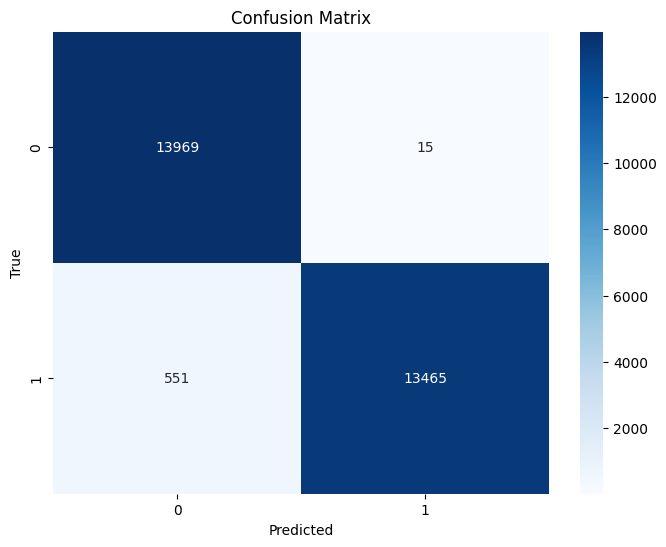

Accuracy: 0.9797857142857143
Precision: 0.9988872403560831
Recall: 0.9606877853881278
F1 Score: 0.9794151876636602


In [26]:
# confusion matrix 생성
conf_matrix = confusion_matrix(y_true, y_pred)

# confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# 평가 지표 계산
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# 평가 지표 출력
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


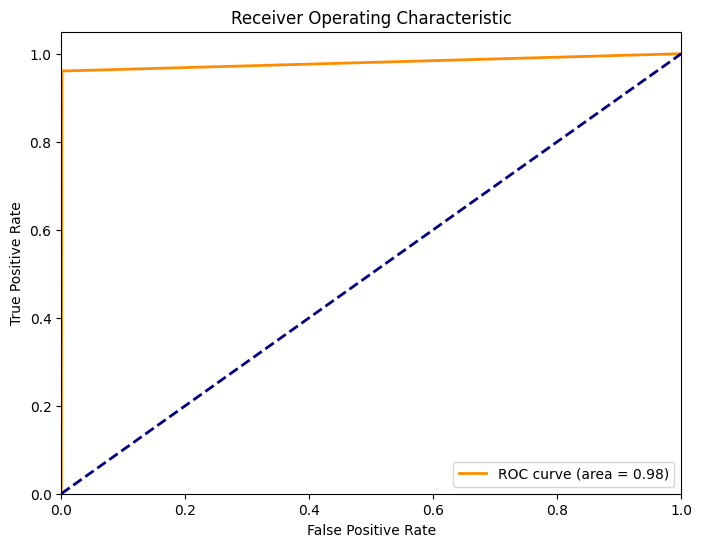

In [27]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [28]:
# correct
# TP (True Positive), 예측 1 실제로도 1
tp = conf_matrix[1, 1]
# TN (True Negative), 예측 0 실제로도 0
tn = conf_matrix[0, 0]

# wrong
# FP (False Positive), 예측 1 실제는 0
fp = conf_matrix[0, 1]
# FN (False Negative), 예측 0 실제는 1
fn = conf_matrix[1, 0]

print("True Positive (TP):", tp)
print("True Negative (TN):", tn)
print("False Positive (FP):", fp)
print("False Negative (FN):", fn)

True Positive (TP): 13465
True Negative (TN): 13969
False Positive (FP): 15
False Negative (FN): 551


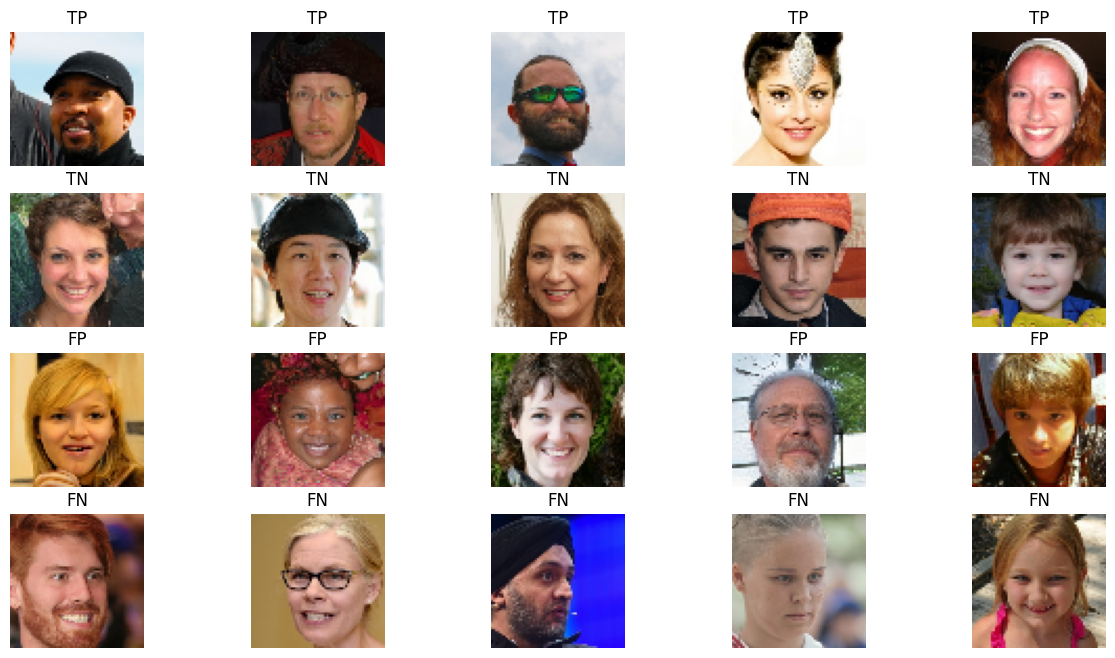

In [29]:
plt.figure(figsize=(15, 8))

# TP 이미지 출력
for i in range(len(tp_images_vgg)):
    plt.subplot(4, 5, i + 1)
    plt.imshow(tp_images[i].numpy().astype("uint8"))
    plt.title('TP')
    plt.axis('off')

# TN 이미지 출력
for i in range(len(tn_images_vgg)):
    plt.subplot(4, 5, i + 6)
    plt.imshow(tn_images[i].numpy().astype("uint8"))
    plt.title('TN')
    plt.axis('off')

# FP 이미지 출력
for i in range(len(fp_images_vgg)):
    plt.subplot(4, 5, i + 11)
    plt.imshow(fp_images[i].numpy().astype("uint8"))
    plt.title('FP')
    plt.axis('off')

# FN 이미지 출력
for i in range(len(fn_images_vgg)):
    plt.subplot(4, 5, i + 16)
    plt.imshow(fn_images[i].numpy().astype("uint8"))
    plt.title('FN')
    plt.axis('off')

plt.show()
